In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('titanic_dataset.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data = pd.read_csv('titanic_dataset.csv', index_col='PassengerId')

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.shape

(891, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

[]

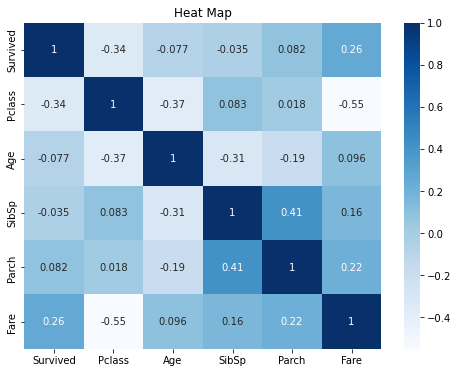

In [9]:
plt.figure(figsize=(8,6))
plt.title('Heat Map')
sns.heatmap(data.corr(),annot=True,cmap="Blues")
plt.plot()

In [10]:
data.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

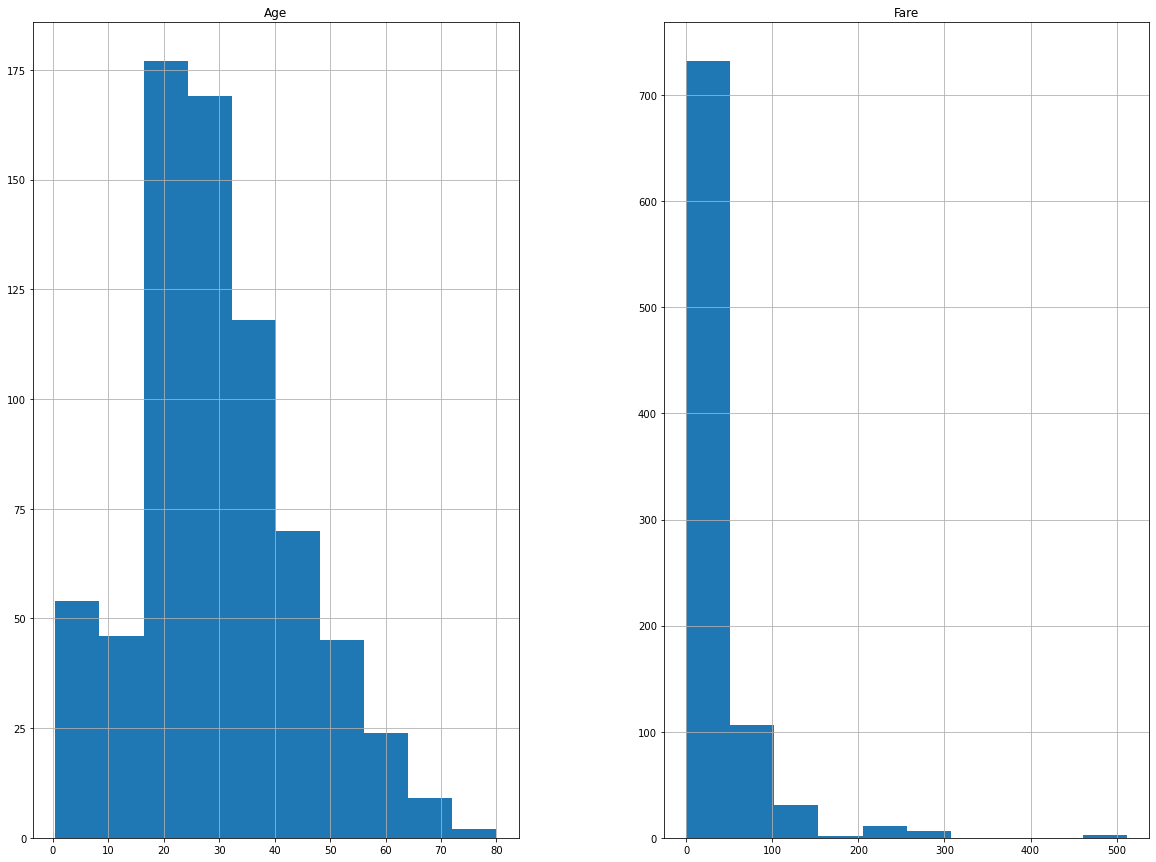

In [11]:
fregraph = data.select_dtypes(include=["float"])
fregraph.hist(figsize=(20,15))
plt.show()

In [12]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [14]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
data['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [16]:
data.drop('Cabin',inplace=True,axis=1)

In [17]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [18]:
data['Embarked'].mode()

0    S
dtype: object

In [19]:
data['Embarked'] = data['Embarked'].fillna("S")

In [20]:
data.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [21]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

Text(0.5, 1.0, 'BOX_PLOT_Age')

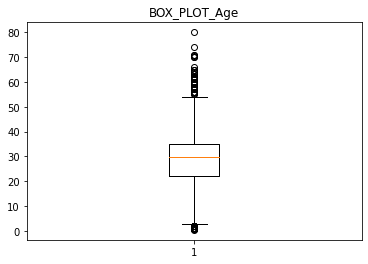

In [22]:
plt.boxplot(data["Age"])
plt.title('BOX_PLOT_Age')

In [23]:
Q1= np.percentile(data['Age'],25,interpolation='midpoint')
Q2= np.percentile(data['Age'],50,interpolation='midpoint')
Q3= np.percentile(data['Age'],75,interpolation='midpoint')  

In [24]:
IQR = Q3-Q1

In [25]:
lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

In [26]:
print (lower_limit,upper_limit)

2.5 54.5


In [27]:
outlier = []
for x in data['Age']:
    if((x>upper_limit) or (x<lower_limit)):
        outlier.append(x)

In [65]:
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [28]:
ind1 =data['Age']>upper_limit
data.loc[ind1].index

Int64Index([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],
           dtype='int64', name='PassengerId')

In [29]:
data.drop([ 12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 196, 233, 253,
            269, 276, 281, 327, 367, 439, 457, 468, 484, 488, 493, 494, 546,
            556, 571, 588, 626, 627, 631, 648, 660, 673, 685, 695, 746, 773,
            830, 852, 880],inplace=True)

In [30]:
ind2=data['Age']<lower_limit
data.loc[ind2].index

Int64Index([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],
           dtype='int64', name='PassengerId')

In [31]:
data.drop([  8,  17,  79, 120, 165, 173, 184, 206, 298, 306, 341, 382, 387,
            470, 480, 531, 643, 645, 756, 789, 804, 825, 828, 832],inplace=True)

Text(0.5, 1.0, 'BOX_PLOT_Age')

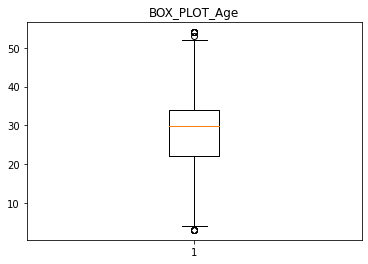

In [32]:
plt.boxplot(data["Age"])
plt.title('BOX_PLOT_Age')

Text(0.5, 1.0, 'BOX_PLOT_fare')

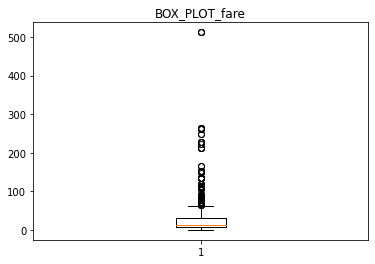

In [33]:
plt.boxplot(data["Fare"])
plt.title('BOX_PLOT_fare')

In [34]:
Q1= np.percentile(data['Fare'],25,interpolation='midpoint')
Q2= np.percentile(data['Fare'],50,interpolation='midpoint')
Q3= np.percentile(data['Fare'],75,interpolation='midpoint')  

In [35]:
IQR = Q3-Q1

In [36]:
lower_limit = Q1-(1.5*IQR)
upper_limit = Q3+(1.5*IQR)

In [37]:
outlier = []
for x in data['Fare']:
    if((x>upper_limit) or (x<lower_limit)):
        outlier.append(x)

In [38]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 63.3583,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 135.6333,
 78.85,
 91.0792,
 247.5208,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 78.2667,
 153.4625,
 65.0,
 77.9583,
 69.3,
 76.7292,
 73.5,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 65.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 83.1583,
 69.55,
 89.1042,
 164.8667,
 69.55]

In [39]:
ind1=(data['Fare']>upper_limit)
data.loc[ind1].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89,  98,
            ...
            780, 790, 793, 803, 821, 836, 847, 850, 857, 864],
           dtype='int64', name='PassengerId', length=107)

In [40]:
ind2=(data['Fare']<lower_limit)
data.loc[ind2].index

Int64Index([], dtype='int64', name='PassengerId')

In [41]:
print(*data.loc[ind1].index, sep=',')

2,28,32,35,53,62,63,73,89,98,103,119,121,125,140,152,160,181,202,216,219,225,231,246,257,258,259,263,270,291,292,300,307,308,311,312,319,320,325,326,333,335,337,338,342,370,374,376,378,381,386,391,394,413,436,446,454,485,487,497,499,505,506,521,528,538,541,545,551,558,559,582,586,592,610,616,628,642,646,656,661,666,680,682,690,699,701,709,717,731,738,742,743,755,760,764,766,780,790,793,803,821,836,847,850,857,864


In [42]:
data.drop([2,32,35,53,62,63,73,93,98,103,119,121,125,140,152,156,216,219,225,231,246,257,258,259,263,270,291,292,300,307,308,311,312,319,320,326,330,333,335,337,338,370,374,376,378,381,386,391,394,413,436,446,454,485,487,497,499,505,506,514,521,524,528,538,541,545,551,558,559,582,586,592,610,616,628,642,646,656,661,666,680,682,690,699,701,709,717,731,738,742,743,755,760,764,766,780,790,803,821,836,850,857],inplace=True)

Text(0.5, 1.0, 'Box plot of Fare')

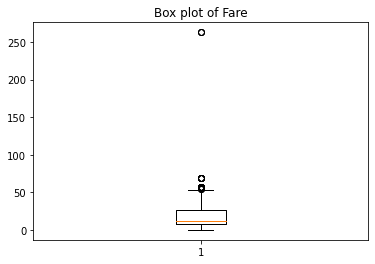

In [43]:
plt.boxplot(data['Fare'])
plt.title("Box plot of Fare")

Text(0.5, 1.0, 'Box plot of SibSp')

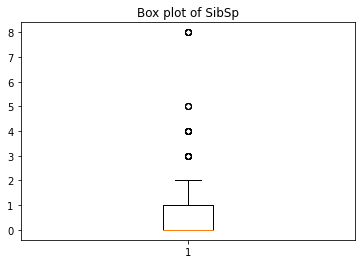

In [44]:
plt.boxplot(data['SibSp'])
plt.title("Box plot of SibSp")

In [45]:
data['SibSp'].unique()

array([1, 0, 3, 2, 4, 5, 8], dtype=int64)

In [46]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [47]:
data['SibSp'].median()

0.0

In [48]:
IQR = Q3-Q1
low_lim = Q1 - 1.5*IQR
up_lim = Q3 + 1.5*IQR
print(low_lim)
print(up_lim)
outlier = []
for x in data['SibSp']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)

-1.5
2.5


In [49]:
outlier

[3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8]

In [50]:
len(outlier)

39

In [51]:
ind1=(data['SibSp']>up_lim)
data.loc[ind1].index

Int64Index([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864],
           dtype='int64', name='PassengerId')

In [52]:
ind2=(data['SibSp']<low_lim)
data.loc[ind2].index

Int64Index([], dtype='int64', name='PassengerId')

In [53]:
data.drop([ 25,  28,  51,  60,  64,  69,  72,  86,  89, 160, 172, 177, 181,
            183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 410, 481, 486,
            542, 543, 635, 684, 687, 727, 788, 793, 814, 820, 847, 851, 864], inplace=True)

Text(0.5, 1.0, 'Box plot of SibSp')

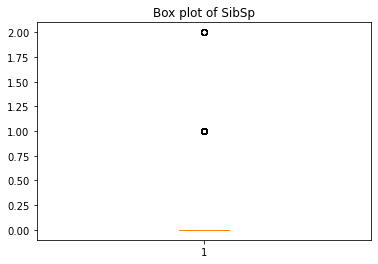

In [54]:
plt.boxplot(data['SibSp'])
plt.title("Box plot of SibSp")

outliers in the data column 'SibSp' has been removed.

# 6. Do min max scaling on the feature set (Take ‘Survived’ as target).

In [55]:
data['Name'].nunique()

684

In [56]:
data['Ticket'].nunique()

592

In [57]:
data['Embarked'].nunique()

3

In [58]:
y= data['Survived']
x = data.drop(['Survived','Name','Sex','Ticket','Embarked'],axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=42, test_size = 0.2)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=42, test_size = 0.2)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
from sklearn.metrics import mean_squared_error
print("MSE is: ", mean_squared_error(y_test,predictions))
from sklearn.metrics import r2_score
print("R-squared value is: ",r2_score(y_test,predictions))

MSE is:  0.19563021376841835
R-squared value is:  0.1228419774917715


# Min Max Scaling

In [59]:
x = data.drop(['Survived','Name','Sex','Ticket','Embarked'],axis=1)

In [60]:
x.describe()

,Pclass,Age,SibSp,Parch,Fare
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,2.504386,29.005059,0.271930,0.267544,16.317275
std,0.714816,9.440358,0.500982,0.755690,12.611508
min,1.000000,3.000000,0.000000,0.000000,0.000000
25%,2.000000,23.000000,0.000000,0.000000,7.854200
50%,3.000000,29.699118,0.000000,0.000000,10.500000
75%,3.000000,33.000000,0.000000,0.000000,23.062500
max,3.000000,54.000000,2.000000,6.000000,57.000000


In [61]:
from sklearn import preprocessing
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))

In [62]:
x = min_max.fit_transform(x)

In [63]:
x = pd.DataFrame(x)
x.describe()

,0,1,2,3,4
count,684.000000,684.000000,684.000000,684.000000,684.000000
mean,0.752193,0.509903,0.135965,0.044591,0.286268
std,0.357408,0.185105,0.250491,0.125948,0.221255
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.392157,0.000000,0.000000,0.137793
50%,1.000000,0.523512,0.000000,0.000000,0.184211
75%,1.000000,0.588235,0.000000,0.000000,0.404605
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=42, test_size = 0.2)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
print("MSE is: ", mean_squared_error(y_test,predictions))
print("R-squared value is: ",r2_score(y_test,predictions))

MSE is:  0.19563021376841838
R-squared value is:  0.12284197749177139


MSE and R-Squared value before and after feature scaling using Min Max Scaling method are the same.

<h5>Conclusion: </h5> Feature scaling does not make a difference in the regression, but may have some practical benefits and in further feature engineering steps.

<h5>Submitted by: Krishnadas M</h5>